In this notebook, we will work on the "Happy House" problem. Let's start by loading the required packages.

In [1]:
import numpy as np
import h5py
from keras import layers
from keras.callbacks import  EarlyStopping, Callback
from keras.utils import np_utils
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import  Conv2D, MaxPool2D,Activation,Dropout,Flatten,Dense, BatchNormalization
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
import pydot
import cv2
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


You decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

Using pictures from the front door camera, you will need to check if the person is happy or not. The dataset contains gathered pictures of your friends and yourself, taken by the front-door camera and is labelled. 

In [2]:
# defining constant values
img_width = 64
img_height = 64
batch_size = 16
channels = 3

In [3]:
def load_dataset():
    train_dataset = h5py.File('../input/happy-house-dataset/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../input/happy-house-dataset/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
X_train_orig, y_train_orig, X_test_orig, y_test_orig, classes = load_dataset()

In [5]:
# Normalize image vectors
X_train = X_train_orig/255
X_test = X_test_orig/255

# Reshape
y_train = y_train_orig.T
y_test = y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
y_test shape: (150, 1)


The "Happy House" dataset contains colored images of size (64x64). The training set has 600 pictures, while the test has 150 pictures. Let's start by having a look at some of the images in the training set.

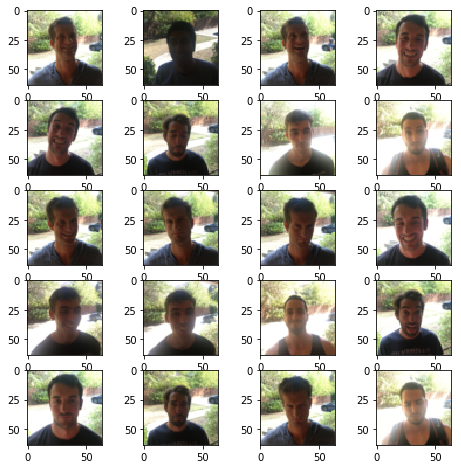

In [6]:
#Visualizing the data
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [7]:
model = Sequential()

model.add(Conv2D(8,(3,3),input_shape=(img_width,img_height,channels),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(16,padding='same',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,padding='same',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(32,kernel_size=(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


#Compile Model
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 16)        64        
_________________________________________________________________
activation_2 (Activat

In [8]:
model.fit(X_train, y_train, batch_size, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
600/600 [==============================] - 2s 4ms/step - loss: 0.5488 - acc: 0.7200
Epoch 2/40
600/600 [==============================] - 0s 498us/step - loss: 0.3525 - acc: 0.8500
Epoch 3/40
600/600 [==============================] - 0s 483us/step - loss: 0.2687 - acc: 0.9100
Epoch 4/40
600/600 [==============================] - 0s 487us/step - loss: 0.2092 - acc: 0.9300
Epoch 5/40
600/600 [==============================] - 0s 495us/step - loss: 0.1714 - acc: 0.9517
Epoch 6/40
600/600 [==============================] - 0s 498us/step - loss: 0.1377 - acc: 0.9583
Epoch 7/40
600/600 [==============================] - 0s 497us/step - loss: 0.1199 - acc: 0.9617
Epoch 8/40
600/600 [==============================] - 0s 496us/step - loss: 0.0993 - acc: 0.9667
Epoch 9/40
600/600 [==============================] - 0s 491us/step - loss: 0.0954 - acc: 0.9783
Epoch 10/40
600/600 [==============================] - 0s 478us/step - loss: 0.09

In [9]:
score = model.evaluate(X_test, y_test, batch_size, verbose=1, sample_weight=None)
print()
print ("Loss = " + str(score[0]))
print ("Test Accuracy = " + str(score[1]))

150/150 [==============================] - 0s 888us/step

Loss = 0.11225155010819435
Test Accuracy = 0.9599999992052713


In [10]:
y_predict = model.predict_classes(X_test)

In [11]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
 
accuracy = accuracy_score(y_test, y_predict)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_predict, average='binary')
 
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

Accuracy:  0.96
Precision:  0.975609756097561
Recall:  0.9523809523809523
F1 score:  0.963855421686747


The training/test sets were quite similar. For example, all the pictures were taken against the same background (since a front door camera is always mounted in the same position). This makes the problem easier, but a model trained on this data may or may not work on other data. Let's try with another picture to see!

[[1.]]


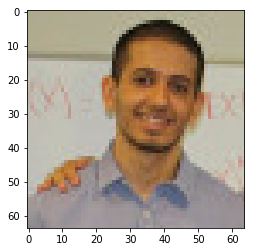

In [14]:
img_path = '../input/own-image-test/my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(model.predict(x))